In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
size_data_set=100000
batch_generate = 100
radius = 5
h = 10
k = 10
df = pd.DataFrame([])
for i in range(int(size_data_set/batch_generate)):
    x = np.random.randint(5,16,size=batch_generate);
    y = np.sqrt(np.square(radius) - np.square(x - h)) + k
    x = x + np.random.randint(-5,5,size=batch_generate)
    y = y + np.random.randint(-5,5,size=batch_generate)
    c = []
    for j in range(x.size):
        f = (x[j] - h)**2 + (y[j] - k)**2 - radius**2
        if(f > 0):
            c.append(1)
        else:
            c.append(0)
    c = np.array(c)
    x.reshape(-1,1)
    y.reshape(-1,1)
    c.reshape(-1,1)
    df_temp = pd.DataFrame({'x':x,'y':y,'c':c})
    df = df.append(df_temp,ignore_index=True)
df.to_csv('data.csv',index=False)
        

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df1 = df.head(1000)

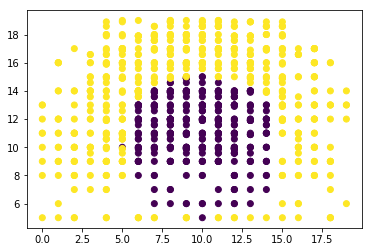

In [4]:
plt.scatter(df1['x'],df1['y'],c=df1['c'])

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [6]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=2))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
X_data = df[['x','y']]
y_label = df['c']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_label, test_size=0.33, random_state=42)

In [10]:
model.fit(X_train,y_train,batch_size=100,epochs=2)

Epoch 1/2
67000/67000 [==============================] - 46s 687us/step - loss: 0.2994 - acc: 0.8577
Epoch 2/2
67000/67000 [==============================] - 48s 709us/step - loss: 0.0713 - acc: 0.9716


In [11]:
model.evaluate(x=X_test,y=y_test)

33000/33000 [==============================] - 14s 410us/step


[0.094758086277679968, 0.9570909090909091]